Importing all the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, balanced_accuracy_score, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

Loading the dataset and performing EDA.

In [2]:
train = pd.read_csv("E:/Engineering/TnP/Projects/DataScience/CreditCardLead/dataset/train_s3TEQDk.csv")

In [3]:
train.shape

(245725, 11)

In [4]:
train_dup = train.head(2000)

In [5]:
train_dup['Serial_Number'] = range(1, len(train_dup) + 1)

In [6]:
train_dup.tail()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Serial_Number
1995,R8X3WVEH,Female,85,RG261,Other,X2,45,No,1648742,Yes,0,1996
1996,YD88FRVI,Male,55,RG280,Self_Employed,X3,97,No,511803,Yes,0,1997
1997,MTKQDYRB,Male,57,RG281,Self_Employed,X2,39,No,667695,No,0,1998
1998,NN4ARGB5,Male,49,RG256,Self_Employed,X2,19,NaN,1044886,Yes,1,1999
1999,JVYKRBKG,Male,85,RG268,Other,X3,98,Yes,379852,No,0,2000


In [7]:
train_dup.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead,Serial_Number
count,2000.000000,2000.000000,2.000000e+03,2000.000000,2000.000000
mean,43.682500,46.071000,1.103683e+06,0.238000,1000.500000
std,14.730281,31.915549,8.212390e+05,0.425966,577.494589
min,24.000000,7.000000,1.416430e+05,0.000000,1.000000
25%,30.000000,20.000000,6.012835e+05,0.000000,500.750000
50%,43.000000,32.000000,8.785320e+05,0.000000,1000.500000
75%,53.000000,69.000000,1.362287e+06,0.000000,1500.250000
max,85.000000,133.000000,8.256124e+06,1.000000,2000.000000


In [8]:
train_dup.isnull().sum()

ID                       0
Gender                   0
Age                      0
Region_Code              0
Occupation               0
Channel_Code             0
Vintage                  0
Credit_Product         220
Avg_Account_Balance      0
Is_Active                0
Is_Lead                  0
Serial_Number            0
dtype: int64

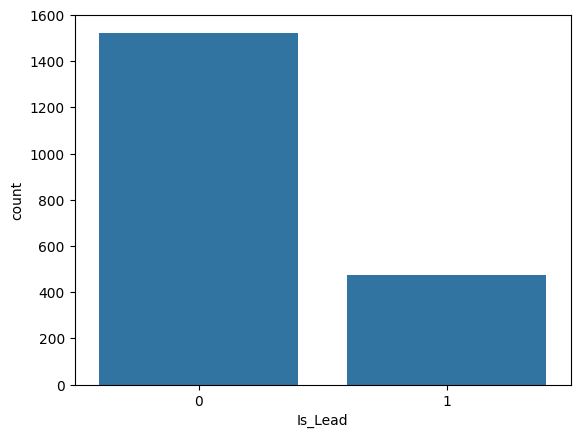

In [9]:
sns.countplot(x='Is_Lead', data=train_dup)
plt.show()

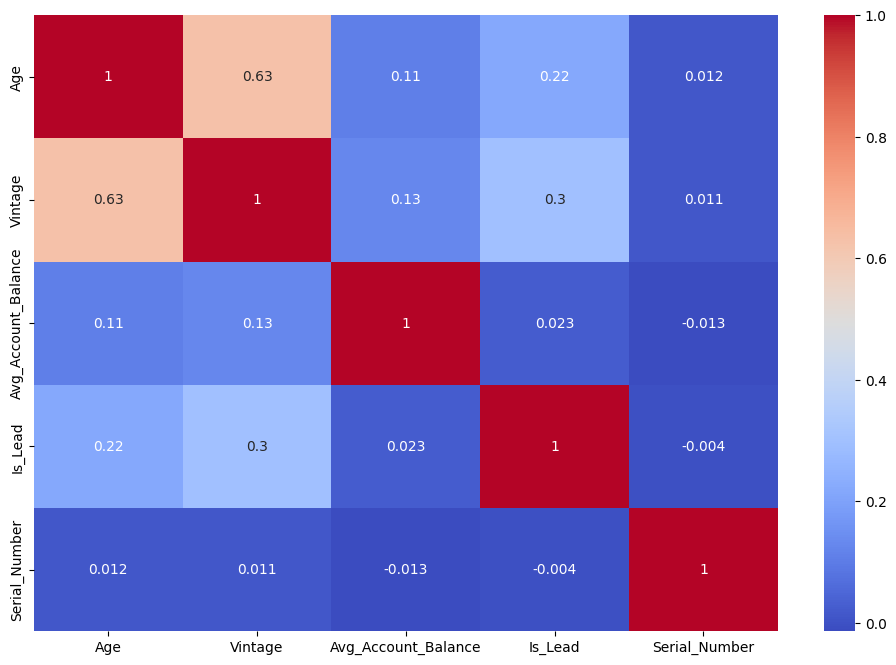

In [10]:
numeric_train_dup = train_dup.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_train_dup.corr(), annot=True, cmap='coolwarm')
plt.show()

In [11]:
train_dup.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead', 'Serial_Number'],
      dtype='object')

Converting "Categorical Variables" in 'train_dup' DataFrame into numerical values through One-Hot Encoding.

Most real-life datasets we encounter during our data science project development have columns of mixed data type. These datasets consist of both categorical as well as numerical columns. However, various Machine Learning models do not work with categorical data and to fit this data into the machine learning model it needs to be converted into numerical data.

In [12]:
#train_dup_encoded = pd.get_dummies(train_dup[['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code', 'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active', 'Is_Lead']], drop_first=True)

In [13]:
train_dup = pd.get_dummies(train_dup, drop_first=True)

In [14]:
train_dup.shape

(2000, 2047)

In [15]:
train_dup

,Age,Vintage,Avg_Account_Balance,Is_Lead,Serial_Number,ID_245FELDT,ID_24TWNPYJ,ID_25GBTWNE,ID_26IVNPEJ,ID_26JMFBCU,...,Region_Code_RG283,Region_Code_RG284,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_Yes,Is_Active_Yes
0,73,43,1045696,0,1,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
1,30,32,581988,0,2,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,56,26,1484315,0,3,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,True
3,34,19,470454,0,4,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,30,33,886787,0,5,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,85,45,1648742,0,1996,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,True
1996,55,97,511803,0,1997,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,True
1997,57,39,667695,0,1998,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False
1998,49,19,1044886,1,1999,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,True


In [16]:
# Splitting the data into Features and Targets.
x_train = train_dup.drop('Is_Lead', axis=1)
y_train = train_dup['Is_Lead']

# Splitting the data in Trainging and Testing Datasets.
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=400, random_state=42)

We standardise features to ensure they have a mean of 0 and a standard deviation of 1, bringing all features to the same scale. This improves the performance and convergence speed of many machine learning algorithms. It also reduces the impact of outliers and ensures that no single feature dominates the model. 

Standardisation enhances the interpretability of model coefficients by making features comparable.

In [17]:
# Standardising the features
scaler = StandardScaler()
train_dup = scaler.fit_transform(train_dup)


In [18]:
print("x_train shape", x_train.shape)
print("x_test shape", x_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)

x_train shape (1600, 2046)
x_test shape (400, 2046)
y_train shape (1600,)
y_test shape (400,)


Training the Machine Learning Models and reviewing their performance.

In [19]:
model_LR = LogisticRegression().fit(x_train, y_train)

LR_pred = model_LR.predict(x_test)
print(LR_pred)

[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1]


In [20]:
print(confusion_matrix(y_test, LR_pred))
print(round(accuracy_score(y_test, LR_pred),2)*100)

[[292  17]
 [ 76  15]]
77.0


In [21]:
logacc = accuracy_score(y_test, LR_pred)
logf1score = f1_score(y_test, LR_pred)
logrecall = recall_score(y_test, LR_pred)
logbal = balanced_accuracy_score(y_test, LR_pred)

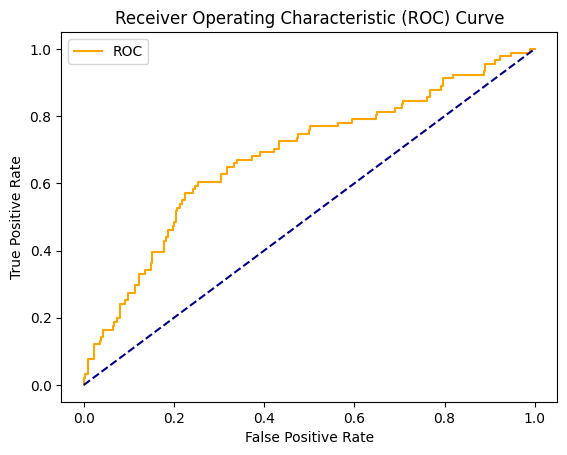

AUC-ROC : 0.6820655073082257


In [22]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
probs = model_LR.predict_proba(x_test)
probs = probs[:, 1]
lrauc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)
print("AUC-ROC :",lrauc)

In [23]:
nb = GaussianNB().fit(x_train, y_train)

nb_pred = nb.predict(x_test)
print(nb_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [24]:
print(confusion_matrix(y_test, nb_pred))
print(round(accuracy_score(y_test, nb_pred),2)*100)

[[305   4]
 [ 90   1]]
77.0


In [25]:
nbacc = accuracy_score(y_test, nb_pred)
nbf1score = f1_score(y_test, nb_pred)
nbrecall = recall_score(y_test, nb_pred)
nbbal = balanced_accuracy_score(y_test, nb_pred)

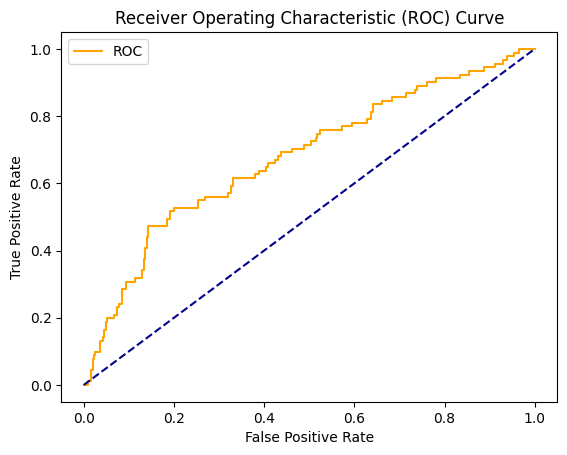

AUC-ROC : 0.6776201145133184


In [26]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
probs = nb.predict_proba(x_test)
probs = probs[:, 1]
nbauc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)
print("AUC-ROC :",nbauc)

In [27]:
dtc = DecisionTreeClassifier().fit(x_train, y_train)

dtc_pred = dtc.predict(x_test)
print(dtc_pred)

[0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1]


In [28]:
print(confusion_matrix(y_test, dtc_pred))
print(round(accuracy_score(y_test, dtc_pred),2)*100)

[[283  26]
 [ 66  25]]
77.0


In [29]:
dtcacc = accuracy_score(y_test, dtc_pred)
dtcf1score = f1_score(y_test, dtc_pred)
dtcrecall = recall_score(y_test, dtc_pred)
dtcbal = balanced_accuracy_score(y_test, dtc_pred)

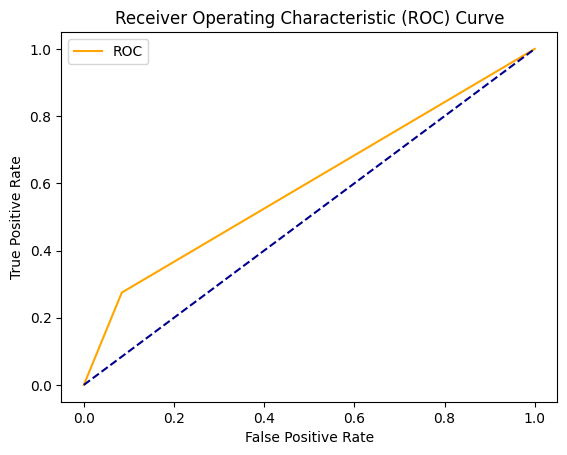

AUC-ROC : 0.595291439951634


In [30]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
probs = dtc.predict_proba(x_test)
probs = probs[:, 1]
dtcauc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)
print("AUC-ROC :",dtcauc)

In [31]:
rfc = RandomForestClassifier().fit(x_train, y_train)

rfc_pred = rfc.predict(x_test)
print(rfc_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [32]:
print(confusion_matrix(y_test, rfc_pred))
print(round(accuracy_score(y_test, rfc_pred),2)*100)

[[303   6]
 [ 85   6]]
77.0


In [33]:
rfcacc = accuracy_score(y_test, rfc_pred)
rfcf1score = f1_score(y_test, rfc_pred)
rfcrecall = recall_score(y_test, rfc_pred)
rfcbal = balanced_accuracy_score(y_test, rfc_pred)

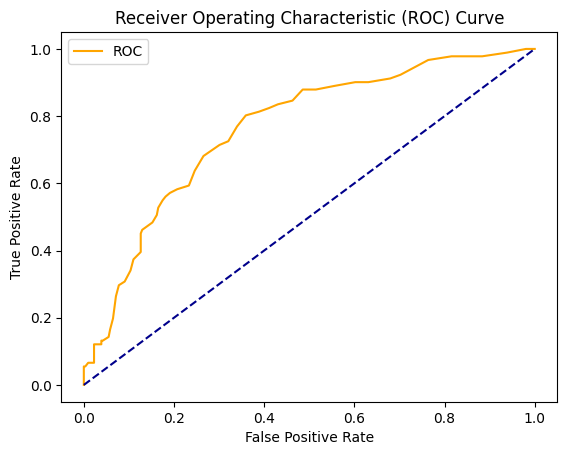

AUC-ROC : 0.7637540453074433


In [34]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
probs = rfc.predict_proba(x_test)
probs = probs[:, 1]
rfcauc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)
print("AUC-ROC :",rfcauc)

In [35]:
svc = SVC(probability=True)

In [36]:
svc.fit(x_train, y_train)

svc_pred = svc.predict(x_test)
print(svc_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [37]:
print(confusion_matrix(y_test, svc_pred))
print(round(accuracy_score(y_test, svc_pred),2)*100)

[[309   0]
 [ 91   0]]
77.0


In [38]:
svcacc = accuracy_score(y_test, svc_pred)
svcf1score = f1_score(y_test, svc_pred)
svcrecall = recall_score(y_test, svc_pred)
svcbal = balanced_accuracy_score(y_test, svc_pred)

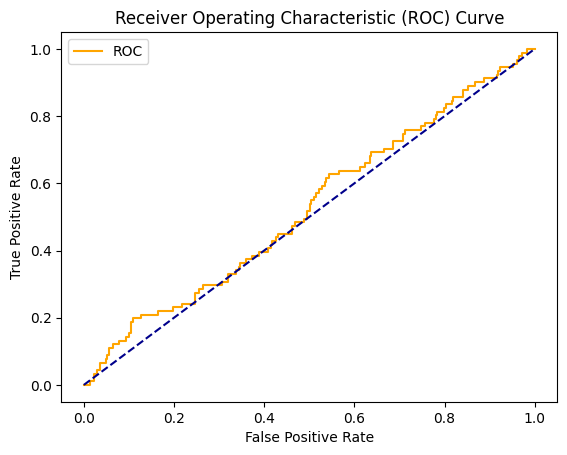

AUC-ROC : 0.5254098652156904


In [39]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
probs = svc.predict_proba(x_test)
probs = probs[:, 1]
svcauc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)
print("AUC-ROC :",svcauc)

In [40]:
knn = KNeighborsClassifier().fit(x_train, y_train)

knn_pred = knn.predict(x_test)
print(knn_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0]


In [41]:
print(confusion_matrix(y_test, knn_pred))
print(round(accuracy_score(y_test, knn_pred), 2) * 100)

[[284  25]
 [ 79  12]]
74.0


In [42]:
knnacc = accuracy_score(y_test, knn_pred)
knnf1score = f1_score(y_test, knn_pred)
knnrecall = recall_score(y_test, knn_pred)
knnbal = balanced_accuracy_score(y_test, knn_pred)

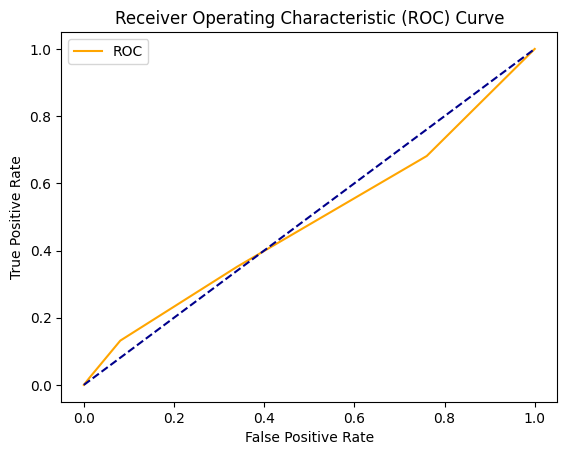

AUC-ROC: 0.48657491375937983


In [43]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
probs = knn.predict_proba(x_test)
probs = probs[:, 1]
knn_auc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)
print("AUC-ROC:", knn_auc)

Creating a list of tuples named 'models', where each tuple represents a model along with its evaluation metrics.

Evaluation metrics:
    1. accuracy_score: Ratio of correctly predicted instances to the total instances.
    2. recall_score: Ratio of true positives to the sum of true positives and false negatives.
    3. f1_score: Harmonic mean of precision and recall. It balances precision and recall and is useful when there is an uneven class distribution.
    4. balanced_accuracy_score: adjusts the accuracy metric by accounting for the imbalance in the classes. It is the average of recall obtained on each class.
    5. roc_auc_score: Computes the Area Under the ROC Curve (ROC AUC), which quantifies the overall performance of a binary classification model based on its ability to discriminate between positive and negative classes (in this case, Is_lead and No_Lead).

In [44]:
models = [('Logistic Regression', logacc, logf1score, logrecall, logbal, lrauc),
          ('Naive_Bayes', nbacc, nbf1score, nbrecall, nbbal, nbauc),
          ('Decision TreeClassifier', dtcacc, dtcf1score, dtcrecall, dtcbal, dtcauc),
          ('RandomForest Classifier', rfcacc, rfcf1score, rfcrecall, rfcbal, rfcauc),
          ('SVC', svcacc, svcf1score, svcrecall, svcbal, svcauc),
          ('KNN', knnacc, knnf1score, knnrecall, knnbal, knn_auc)]

In [45]:
# creating a dataframe
predict = pd.DataFrame(models, columns=['Model', 'Accuracy', 'F1-Score', 'Recall', 'Balanced Accuracy', 'AUC-ROC'])
predict

,Model,Accuracy,F1-Score,Recall,Balanced Accuracy,AUC-ROC
0,Logistic Regression,0.7675,0.243902,0.164835,0.554909,0.682066
1,Naive_Bayes,0.7650,0.020833,0.010989,0.499022,0.677620
2,Decision TreeClassifier,0.7700,0.352113,0.274725,0.595291,0.595291
3,RandomForest Classifier,0.7725,0.116505,0.065934,0.523258,0.763754
4,SVC,0.7725,0.000000,0.000000,0.500000,0.525410
5,KNN,0.7400,0.187500,0.131868,0.525481,0.486575


In [46]:
cm = sns.light_palette("blue", as_cmap=True)
s = predict.style.background_gradient(cmap=cm)
s

,Model,Accuracy,F1-Score,Recall,Balanced Accuracy,AUC-ROC
0,Logistic Regression,0.767500,0.243902,0.164835,0.554909,0.682066
1,Naive_Bayes,0.765000,0.020833,0.010989,0.499022,0.677620
2,Decision TreeClassifier,0.770000,0.352113,0.274725,0.595291,0.595291
3,RandomForest Classifier,0.772500,0.116505,0.065934,0.523258,0.763754
4,SVC,0.772500,0.000000,0.000000,0.500000,0.525410
5,KNN,0.740000,0.187500,0.131868,0.525481,0.486575


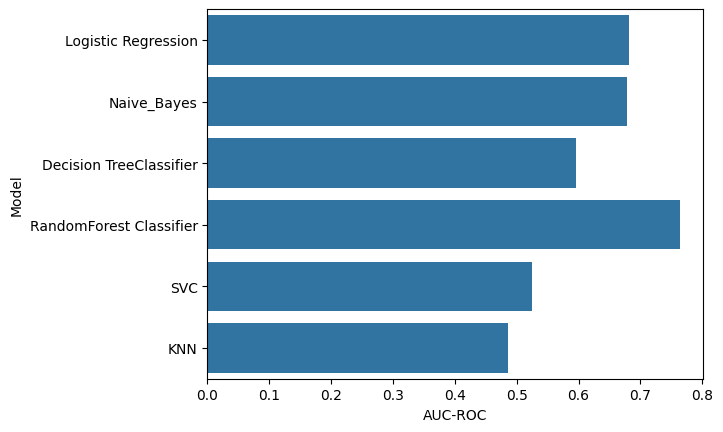

In [47]:
ax = sns.barplot(y="Model", x="AUC-ROC", data=predict)

In [48]:
# finding the best model based on overall perormance of the moels.
best_model = predict.loc[predict['AUC-ROC'] == predict['AUC-ROC'].max()]
print("Best Model for Predicting Leads:")
print(best_model)


Best Model for Predicting Leads:
                     Model  Accuracy  F1-Score    Recall  Balanced Accuracy  \
3  RandomForest Classifier    0.7725  0.116505  0.065934           0.523258   

    AUC-ROC  
3  0.763754  


Save the trained Random Forest Classifier (rfc) model to a file ('rfc_model1.pkl') for future use, allowing it to be easily reloaded and used for predictions without needing to retrain the model.

In [49]:
import joblib
joblib.dump(rfc, 'rfc_model1.pkl')

['rfc_model1.pkl']

Importing the testing data.

In [50]:
testing_data = pd.read_csv("E:/Engineering/TnP/Projects/DataScience/CreditCardLead/dataset/test_mSzZ8RL.csv")

In [51]:
testing_data

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No
...,...,...,...,...,...,...,...,...,...,...
105307,DBENJOYI,Male,52,RG268,Salaried,X2,86,Yes,4242558,Yes
105308,CWQ72DWS,Male,55,RG277,Other,X2,86,Yes,1159153,No
105309,HDESC8GU,Male,35,RG254,Salaried,X4,15,No,1703727,No
105310,2PW4SFCA,Male,53,RG254,Other,X3,93,No,737178,Yes


In [52]:
testing_data['Serial_Number'] = range(1, len(testing_data) + 1)

In [53]:
testing_data.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Serial_Number'],
      dtype='object')

In [54]:
testing_data

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Serial_Number
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No,1
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No,2
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No,3
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No,4
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No,5
...,...,...,...,...,...,...,...,...,...,...,...
105307,DBENJOYI,Male,52,RG268,Salaried,X2,86,Yes,4242558,Yes,105308
105308,CWQ72DWS,Male,55,RG277,Other,X2,86,Yes,1159153,No,105309
105309,HDESC8GU,Male,35,RG254,Salaried,X4,15,No,1703727,No,105310
105310,2PW4SFCA,Male,53,RG254,Other,X3,93,No,737178,Yes,105311


In [55]:
testing_data_dup = testing_data.sample(2000)
testing_data_dup

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Serial_Number
49705,GZNRMMYX,Male,61,RG268,Other,X3,123,NaN,1130816,No,49706
1973,7UVWTHEE,Female,31,RG279,Self_Employed,X1,26,No,686376,No,1974
57532,SCSHETWR,Female,71,RG268,Other,X2,32,Yes,918186,No,57533
17058,J6HSGRKH,Female,34,RG277,Self_Employed,X4,15,NaN,1901351,Yes,17059
45238,Q2NPTRM9,Female,31,RG270,Salaried,X1,39,No,510797,No,45239
...,...,...,...,...,...,...,...,...,...,...,...
16125,S9LXJFUH,Female,32,RG254,Other,X1,26,No,680591,No,16126
8333,DWYNP63O,Female,67,RG268,Other,X3,117,Yes,614829,No,8334
18395,LJMCGFB2,Male,53,RG254,Self_Employed,X2,97,Yes,2929764,No,18396
21712,IVHDDCEQ,Female,41,RG266,Other,X1,26,No,707131,Yes,21713


Converting categorical variabkles into numerical variables.

In [56]:
testing_data_dup = pd.get_dummies(testing_data_dup, drop_first=True)

Comaparing the columns in Training and Testing dataset

In [57]:
missing_cols = set(x_train.columns) - set(testing_data.columns)
for col in missing_cols:
    testing_data_dup[col] = 0
testing_data_dup = testing_data_dup[x_train.columns]
testing_data_dup

,Age,Vintage,Avg_Account_Balance,Serial_Number,ID_245FELDT,ID_24TWNPYJ,ID_25GBTWNE,ID_26IVNPEJ,ID_26JMFBCU,ID_26QY7JID,...,Region_Code_RG283,Region_Code_RG284,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_Yes,Is_Active_Yes
49705,61,123,1130816,49706,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1973,31,26,686376,1974,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57532,71,32,918186,57533,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17058,34,15,1901351,17059,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45238,31,39,510797,45239,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16125,32,26,680591,16126,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8333,67,117,614829,8334,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18395,53,97,2929764,18396,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21712,41,26,707131,21713,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Loading the pre-trained model to apply it over the testing data.

In [58]:
rfc_load = joblib.load('rfc_model1.pkl')

In [59]:
final_pred = rfc_load.predict(testing_data_dup)
final_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

Saving the result into a .csv file.

In [60]:
submission = pd.DataFrame({'Serial_Number': testing_data_dup['Serial_Number'], 'Is_Lead': final_pred})
submission.to_csv("E:/Engineering/TnP/Projects/DataScience/CreditCardLead/Submission.csv", index=True)

In [61]:
print(submission)

       Serial_Number  Is_Lead
49705          49706        0
1973            1974        0
57532          57533        0
17058          17059        0
45238          45239        0
...              ...      ...
16125          16126        0
8333            8334        0
18395          18396        1
21712          21713        0
52744          52745        0

[2000 rows x 2 columns]


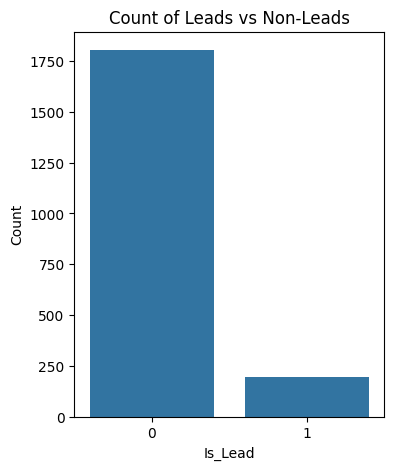

In [62]:
plt.figure(figsize=(4, 5))
sns.countplot(data=submission, x='Is_Lead')
plt.title('Count of Leads vs Non-Leads')
plt.xlabel('Is_Lead')
plt.ylabel('Count')
plt.show()

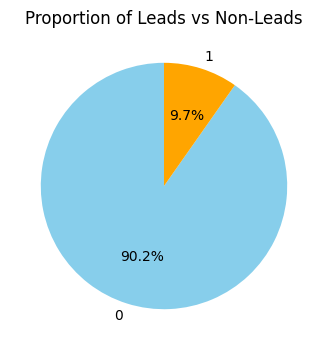

In [63]:
plt.figure(figsize=(4, 4))
submission['Is_Lead'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'])
plt.title('Proportion of Leads vs Non-Leads')
plt.ylabel('')
plt.show()

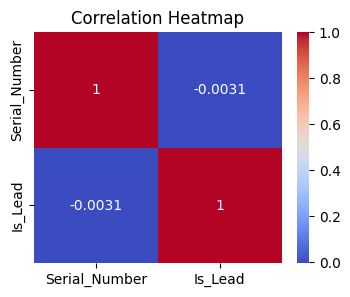

In [64]:
plt.figure(figsize=(4, 3))
corr_matrix = submission.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()